In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam # - Works

In [3]:
np.random.seed(0)

In [4]:
import gzip
import sys
import pickle

In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
len(train_X)

60000

In [7]:
len(test_X)

10000

8

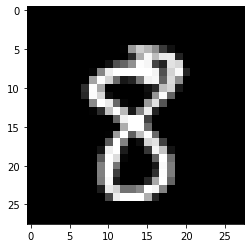

In [8]:
test_rand = np.random.randint(2,100)
plt.imshow(train_X[test_rand],cmap= 'gray')
train_y[test_rand]

In [9]:
print(train_X.shape)
print(test_y.shape)

(60000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2 152 203 181 141  58
   17   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  40 172 247 188 232
  234  35   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17  82 101 143 252 245  67  35
  225 214   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5 132 237 254 254 254 254 25

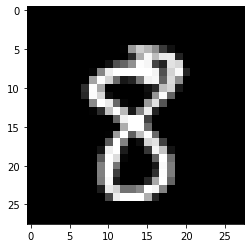

In [10]:
plt.imshow(train_X[test_rand],cmap= 'gray')
print(train_X[test_rand])

In [11]:
num_of_samples=[]
cols = 5
num_classes = 10

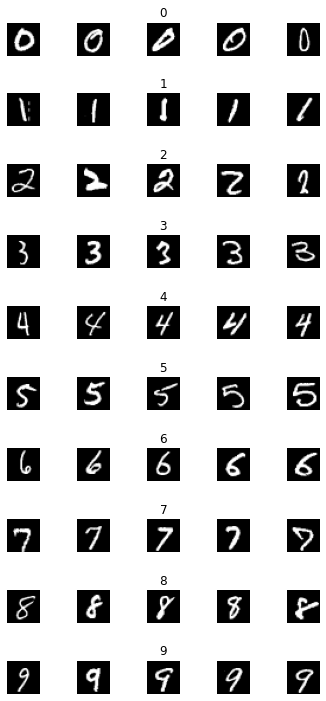

In [12]:
fig, axs = plt.subplots(nrows= num_classes, ncols=cols, figsize= (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = train_X[train_y== j]
    axs[j][i].imshow(x_selected[np.random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


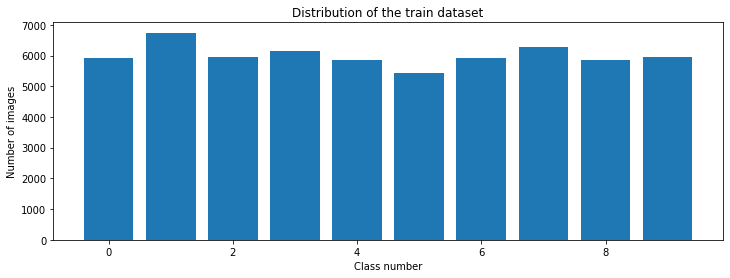

In [13]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

## Preprocessing the Data
 Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
train_X.max()

255

In [15]:
train_X = train_X/255
test_X = test_X/255

 Reshapeing the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [16]:
train_X.shape

(60000, 28, 28)

In [17]:
train_X = train_X.reshape(-1, 28, 28,1)
train_X.shape

(60000, 28, 28, 1)

In [18]:
test_X.shape

(10000, 28, 28)

In [19]:
test_X= test_X.reshape(-1, 28, 28,1)

In [20]:
test_X.shape

(10000, 28, 28, 1)

 Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
cat_train_y = to_categorical(train_y)
cat_test_y = to_categorical(test_y)

In [22]:
cat_train_y.shape

(60000, 10)

In [23]:
cat_test_y.shape

(10000, 10)

# Building the Model

In [24]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss ='categorical_crossentropy', metrics=['accuracy'])
  return model

In [25]:
lenet = le_net()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [27]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [28]:
history= lenet.fit(train_X,cat_train_y, epochs=20, validation_split= 0.1, batch_size=400,verbose=1,shuffle=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
135/135 [==============================] - 14s 41ms/step - loss: 0.6046 - accuracy: 0.8095 - val_loss: 0.1067 - val_accuracy: 0.9715
Epoch 2/20
135/135 [==============================] - 5s 40ms/step - loss: 0.1627 - accuracy: 0.9518 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 3/20
135/135 [==============================] - 5s 40ms/step - loss: 0.1128 - accuracy: 0.9663 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 4/20
135/135 [==============================] - 5s 40ms/step - loss: 0.0882 - accuracy: 0.9731 - val_loss: 0.0443 - val_accuracy: 0.9883
Epoch 5/20
135/135 [==============================] - 5s 40ms/step - loss: 0.0782 - accuracy: 0.9767 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 6/20
135/135 [==============================] - 6s 42ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.0389 - val_accuracy: 0.9893
Epoch 7/20
135/135 [==============================] - 5s 38ms/step - loss: 0.0615 - accuracy: 0.9813 - val_loss: 0.0374 - val_accuracy: 0.990

### Evaluating the Model

**TASK 7: Showing the accuracy,precision,recall,f1-score the model achieved on the X_test data set.

Text(0.5, 0, 'epoch')

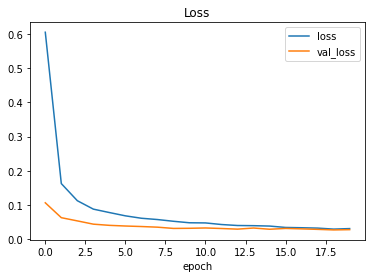

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

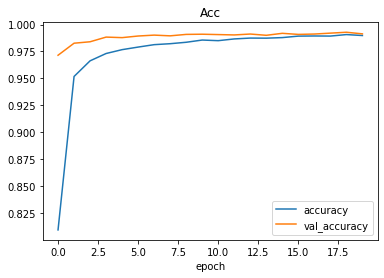

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Acc')
plt.xlabel('epoch')

In [31]:
lenet.metrics_names

['loss', 'accuracy']

In [32]:
cat_test_y = to_categorical(test_y)

In [33]:
lenet.evaluate(test_X,cat_test_y)

  4/313 [..............................] - ETA: 5s - loss: 0.0023 - accuracy: 1.0000 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 6s 18ms/step - loss: 0.0222 - accuracy: 0.9924


[0.022234484553337097, 0.9923999905586243]

In [34]:
from sklearn.metrics import classification_report

In [35]:

predictions = (lenet.predict(test_X) > 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [36]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [37]:
y_predict = np.argmax(lenet.predict(test_X), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [38]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [39]:
print(classification_report(test_y, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Testing the Model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


predicted number is 5



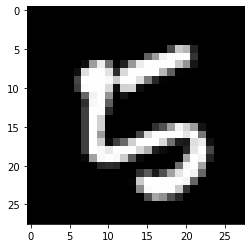

In [40]:
rand_num = np.random.randint(0,10000)
test_img = test_X[rand_num]
test_img= test_img.reshape(1,28,28,1)
print('predicted number is', np.argmax(lenet.predict(test_img), axis=-1)[0])
print()

# checking the predicted num imgage
test_img= test_img.reshape(28,28)
plt.imshow(test_img, cmap='gray')

**Plotting the model flow diagram**

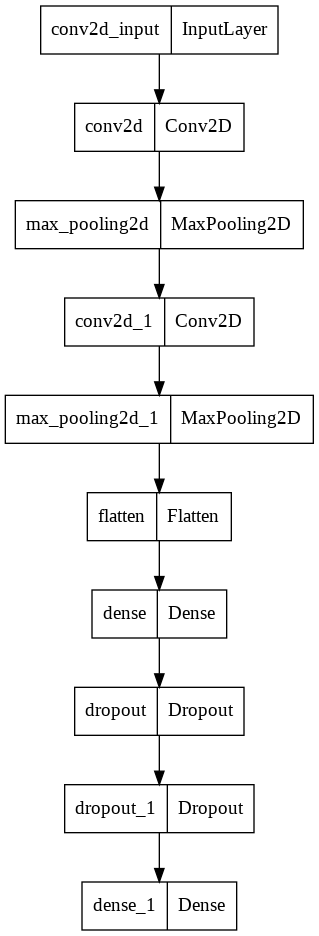

In [41]:
from tensorflow.keras.utils import plot_model
# plot graph
plot_model(lenet, to_file='simple_model.png')

In [51]:
layer = lenet.layers

In [52]:
len(layer)

9

**Plotting the Filters**

In [62]:
# def get_filter_biases(i):
filters, biases = lenet.layers[0].get_weights()
print(layer[3].name, filters.shape)

max_pooling2d_1 (5, 5, 1, 30)


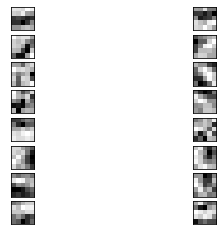

In [67]:
fig1 = plt.Figure(figsize = (15, 20))
columns = 2
rows = 8
n_filters = columns*rows
for i in range(1, n_filters+1):
  f = filters[:, :, :, i-1]
  fig1 = plt.subplot(rows, columns , i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:, :, 0], cmap = 'gray')
plt.show()

In [71]:
conv_layer_index = [1, 3]
outputs = [lenet.layers[i].output for i in conv_layer_index]
lenet_short = Model(inputs = lenet.inputs, outputs = outputs)
print(lenet_short.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
Total params: 4,845
Trainable params: 4,845
Non-trainable p

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


predicted number is 1



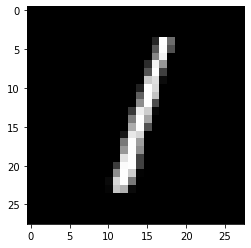

In [83]:
test_img = test_X[2]
test_img= test_img.reshape(1,28,28,1)
print('predicted number is', np.argmax(lenet.predict(test_img), axis=-1)[0])
print()

# checking the predicted num imgage
test_img= test_img.reshape(28,28)
plt.imshow(test_img, cmap='gray')

In [80]:
from keras.preprocessing.image import load_img, img_to_array
img = test_X[2]
img = img_to_array(img)
img= img.reshape(1,28,28,1)

In [81]:
feature_output = lenet_short.predict(img)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


**Plotting the Immidiate outputs of the COnvolution layer**

1


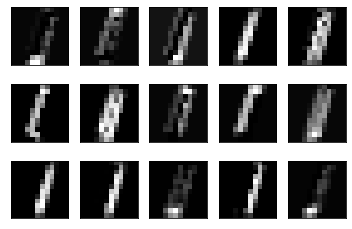

1


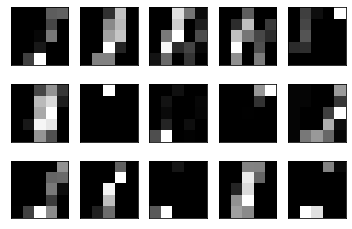

In [96]:
columns = 5
rows = 3
for ftr in feature_output:
  fig = plt.Figure(figsize = (15, 20))
  for i in range(1, columns*rows +1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap = 'gray')
  print('1')
  plt.show()